## **13. Naive Bayes I - Theory**

---

### **Naive Bayes Algorithm: Overview**

Naive Bayes is a probabilistic classification algorithm based on **Bayes' Theorem** with the assumption that all features are **conditionally independent** given the class label. It’s called "naive" because of this strong, often unrealistic, independence assumption, but it works surprisingly well in many real-world applications.

---

### **Mathematical Foundation: Bayes' Theorem**

Bayes' Theorem is the basis for Naive Bayes. It describes the probability of a class $C $ given some observed features $ X = (x_1, x_2, \dots, x_n) $:

$$
P(C | X) = \frac{P(X | C) P(C)}{P(X)}
$$

Where:
- $ P(C | X) $ is the **posterior** probability of class $ C $ given the features $ X $.
- $ P(X | C) $ is the **likelihood** of the features $ X $ given the class $ C $.
- $ P(C) $ is the **prior** probability of the class $ C $.
- $ P(X) $ is the **evidence** (the probability of observing the features $ X $).

### **Naive Assumption**

The core assumption in Naive Bayes is that the features are conditionally independent given the class label, so:

$$
P(X | C) = P(x_1, x_2, \dots, x_n | C) = \prod_{i=1}^{n} P(x_i | C)
$$

This makes the likelihood calculation easier as it breaks down the joint likelihood into a product of individual likelihoods. The Naive Bayes classifier becomes:

$$
P(C | X) \propto P(C) \prod_{i=1}^{n} P(x_i | C)
$$

The predicted class $ C_{\text{pred}} $ is:

$$
C_{\text{pred}} = \arg \max_C \left( P(C) \prod_{i=1}^{n} P(x_i | C) \right)
$$

### **Types of Naive Bayes**
1. **Gaussian Naive Bayes**: Assumes that the features follow a normal distribution, suitable for continuous data.
2. **Multinomial Naive Bayes**: Suitable for count-based data (e.g., text classification).
3. **Bernoulli Naive Bayes**: Used for binary features (e.g., 0 or 1).

---

### **Hand Worked Example: Gaussian Naive Bayes**

Let’s walk through a simple example of **Gaussian Naive Bayes**. We have a small dataset where we want to predict if a person will buy a product based on their age and income.

| Age   | Income | Buy (Class) |
|-------|--------|-------------|
| 20    | Low    | No          |
| 25    | Medium | No          |
| 30    | High   | Yes         |
| 35    | High   | Yes         |
| 40    | Medium | Yes         |

We want to predict the likelihood of **Age = 30**, **Income = Medium**.

#### Step 1: Calculate Prior Probabilities $ P(C) $

- Total samples = 5
- Count of **Yes** (Buy) = 3
- Count of **No** (Not Buy) = 2

Prior probabilities:
$$
P(\text{Buy}) = \frac{3}{5} = 0.6, \quad P(\text{Not Buy}) = \frac{2}{5} = 0.4
$$

#### Step 2: Calculate Likelihoods for Features

##### For **Age**:
- **Buy**: Ages = [30, 35, 40]
  - Mean $ \mu_{\text{Buy}} $ = 35, Variance $ \sigma^2_{\text{Buy}} $ = 25
- **Not Buy**: Ages = [20, 25]
  - Mean $ \mu_{\text{Not Buy}} $ = 22.5, Variance $ \sigma^2_{\text{Not Buy}} $ = 6.25

We’ll use the Gaussian distribution formula to calculate likelihoods.

$$
P(\text{Age} = 30 | \text{Buy}) = \frac{1}{\sqrt{2 \pi \cdot 25}} \exp\left(-\frac{(30 - 35)^2}{2 \cdot 25}\right) = 0.037
$$

$$
P(\text{Age} = 30 | \text{Not Buy}) = \frac{1}{\sqrt{2 \pi \cdot 6.25}} \exp\left(-\frac{(30 - 22.5)^2}{2 \cdot 6.25}\right) = 0.043
$$

##### For **Income**:
Assuming **Income** is categorical (Low, Medium, High):
- **Buy**: $ P(\text{Medium} | \text{Buy}) = \frac{1}{3} = 0.33 $
- **Not Buy**: $ P(\text{Medium} | \text{Not Buy}) = \frac{1}{2} = 0.5 $

#### Step 3: Apply the Naive Assumption

Now, we compute the posterior probability for each class using the Naive Bayes formula.

$$
P(\text{Buy} | \text{Age} = 30, \text{Income} = \text{Medium}) \propto P(\text{Buy}) \cdot P(\text{Age} = 30 | \text{Buy}) \cdot P(\text{Income} = \text{Medium} | \text{Buy})
$$
$$
= 0.6 \cdot 0.037 \cdot 0.33 = 0.0073
$$

$$
P(\text{Not Buy} | \text{Age} = 30, \text{Income} = \text{Medium}) \propto P(\text{Not Buy}) \cdot P(\text{Age} = 30 | \text{Not Buy}) \cdot P(\text{Income} = \text{Medium} | \text{Not Buy})
$$
$$
= 0.4 \cdot 0.043 \cdot 0.5 = 0.0086
$$

#### Step 4: Class Prediction

The posterior probability of **Not Buy** is higher (0.0086 vs. 0.0073), so the predicted class is **Not Buy**.

---

### **Conclusion**

The Naive Bayes algorithm, despite its assumption of feature independence, can be very effective for classification tasks, especially in scenarios like text classification, spam detection, and other applications where features might be conditionally independent. The core steps include calculating the prior probabilities, likelihoods, and then using Bayes' theorem to make predictions based on the class with the highest posterior probability.


## **1. Titanic Survival Prediction Classification with Naive Bayes (Theory)**

Let's walk through the **Naive Bayes** algorithm using the **Titanic survival dataset** as an example. In this dataset, the goal is to predict whether a passenger survived based on various features like age, sex, class, etc.

### Problem Overview

We want to predict whether a passenger survived on the Titanic ($ C $, the class label) using features like:
- Age
- Sex
- Class (e.g., 1st, 2nd, 3rd class)

We will assume that the features are conditionally independent given the survival class.

### Dataset Example

For simplicity, let's say we have a small dataset with the following columns:
- **Survived (C)**: 0 = No, 1 = Yes
- **Age (x₁)**: Age of the passenger (continuous feature)
- **Sex (x₂)**: Sex of the passenger (categorical feature, e.g., Male or Female)

| Age  | Sex    | Survived |
|------|--------|----------|
| 22   | Male   | 0        |
| 38   | Female | 1        |
| 26   | Female | 1        |
| 35   | Male   | 0        |
| 28   | Female | 1        |

### Step 1: Calculate Prior Probabilities $ P(C) $

Before we calculate the likelihoods, we need to compute the prior probabilities of the classes (Survived = 1 or Survived = 0).

- **Total samples** = 5
- **Survived = 1** (Yes) = 3 passengers
- **Survived = 0** (No) = 2 passengers

So, the prior probabilities are:

$$
P(\text{Survived} = 1) = \frac{3}{5} = 0.6, \quad P(\text{Survived} = 0) = \frac{2}{5} = 0.4
$$

### Step 2: Calculate Likelihoods for Features

#### Feature 1: Age (Continuous)

We will assume that the **Age** feature follows a **Gaussian (normal) distribution** for each class. Let's compute the likelihoods for **Age** given each class:

- For **Survived = 1** (Yes), the ages are [38, 26, 28]:
  - Mean $ \mu_{\text{Survived=1}} $ = 30.67
  - Variance $ \sigma^2_{\text{Survived=1}} $ = 28.89

- For **Survived = 0** (No), the ages are [22, 35]:
  - Mean $ \mu_{\text{Survived=0}} $ = 28.5
  - Variance $ \sigma^2_{\text{Survived=0}} $ = 26.25

To calculate the likelihood $ P(\text{Age} = 30 | \text{Survived = 1}) $, we use the Gaussian probability density function:

$$
P(\text{Age} = 30 | \text{Survived = 1}) = \frac{1}{\sqrt{2 \pi \cdot 28.89}} \exp\left(-\frac{(30 - 30.67)^2}{2 \cdot 28.89}\right) = 0.036
$$

Similarly, for **Survived = 0**:

$$
P(\text{Age} = 30 | \text{Survived = 0}) = \frac{1}{\sqrt{2 \pi \cdot 26.25}} \exp\left(-\frac{(30 - 28.5)^2}{2 \cdot 26.25}\right) = 0.036
$$

#### Feature 2: Sex (Categorical)

For **Sex**, we simply count the occurrences of each sex within each class:

- For **Survived = 1**:
  - Female = 3 (since all passengers that survived are female)
  - $ P(\text{Sex} = \text{Female} | \text{Survived = 1}) = \frac{3}{3} = 1 $

- For **Survived = 0**:
  - Male = 2 (since both non-surviving passengers are male)
  - $ P(\text{Sex} = \text{Male} | \text{Survived = 0}) = \frac{2}{2} = 1 $

### Step 3: Apply the Naive Assumption

Now, let’s apply the **Naive Bayes** formula to predict the survival probability for a new passenger, say with:
- Age = 30
- Sex = Female

We calculate the posterior probabilities for **Survived = 1** and **Survived = 0**:

For **Survived = 1**:

$$
P(\text{Survived} = 1 | \text{Age} = 30, \text{Sex} = \text{Female}) \propto P(\text{Survived} = 1) \cdot P(\text{Age} = 30 | \text{Survived = 1}) \cdot P(\text{Sex} = \text{Female} | \text{Survived = 1})
$$

Substitute the values:

$$
P(\text{Survived} = 1 | \text{Age} = 30, \text{Sex} = \text{Female}) \propto 0.6 \cdot 0.036 \cdot 1 = 0.0216
$$

For **Survived = 0**:

$$
P(\text{Survived} = 0 | \text{Age} = 30, \text{Sex} = \text{Female}) \propto P(\text{Survived} = 0) \cdot P(\text{Age} = 30 | \text{Survived = 0}) \cdot P(\text{Sex} = \text{Female} | \text{Survived = 0})
$$

Substitute the values:

$$
P(\text{Survived} = 0 | \text{Age} = 30, \text{Sex} = \text{Female}) \propto 0.4 \cdot 0.036 \cdot 0 = 0
$$

### Step 4: Class Prediction

Since the probability of **Survived = 0** is 0 and the probability of **Survived = 1** is non-zero, we predict that this passenger would survive.

### Conclusion

In this example, using **Naive Bayes**, we predict that a 30-year-old female passenger has a higher probability of surviving, given the simplified features (Age and Sex). Even with the assumption of conditional independence, **Naive Bayes** can provide useful predictions when the data fits the model's assumptions, and it's often used for problems like spam filtering, medical diagnoses, and other classification tasks.

## **2. Python Implementation:**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Load dataset, check data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# 2. Perform data cleaning and feature selection
# We want to predict "Survived" based on "Sex", "Fare" and "Age"
# Inputs = Sex, Fare, Age, Y = Survived
X = df[['Sex', 'Fare', 'Age']]
y = df['Survived']
X.head()


,Sex,Fare,Age
0,male,7.2500,22.0
1,female,71.2833,38.0
2,female,7.9250,26.0
3,female,53.1000,35.0
4,male,8.0500,35.0


In [34]:
# Median impute "Age" and encode "Sex"
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Sex'] = pd.Categorical(X['Sex'])
X['Sex_n'] = X['Sex'].cat.codes
X = X.drop('Sex', axis = 1)
X.head()

# Male = 1; Female = 0

,Fare,Age,Sex_n
0,7.2500,22.0,1
1,71.2833,38.0,0
2,7.9250,26.0,0
3,53.1000,35.0,0
4,8.0500,35.0,1


In [35]:
# 3. Split data into training and testing components
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# 4. Create a Gaussian Naive Bayes Object; fit it and evaluate the score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.776536312849162

In [40]:
# 5. Create a Confusion Matrix
y_predicted = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[86, 19],
       [21, 53]])

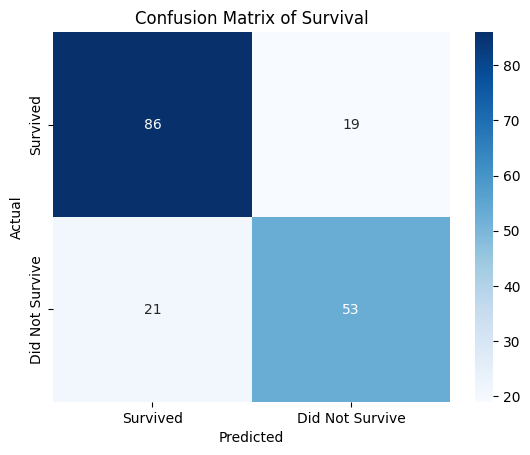

In [43]:
# 6. Create a Seaborn heatmap
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels=['Survived', 'Did Not Survive'],
            yticklabels=['Survived', 'Did Not Survive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Survival')
plt.show()